# HEART ATTACK PREDICTION

## 🎯 Objective

This project aims to build a machine learning model that predicts the likelihood of a heart attack in individuals based on medical and lifestyle features. The goal is to support early diagnosis and preventive healthcare using data-driven insights.

Key goals include:
- Preprocessing real-world heart disease data for modeling.
- Identifying important risk factors via exploratory data analysis.
- Training and evaluating various ML algorithms (e.g., Logistic Regression, Random Forest, XGBoost).
- Optimizing the model with techniques like hyperparameter tuning.
- (Optional) Deploying a user-friendly interface for real-time predictions.

This tool can help healthcare providers identify high-risk patients and act before it’s too late.


### 🫀 What is a Heart Attack?
A heart attack, also known as myocardial infarction, occurs when the flow of oxygen-rich blood to a part of the heart muscle is blocked or reduced, usually due to a buildup of plaque (fat, cholesterol, and other substances) in the coronary arteries. This blockage can damage or destroy part of the heart muscle if not treated quickly.

Common Symptoms:

Chest pain or discomfort

Shortness of breath

Nausea, lightheadedness

Pain in the jaw, neck, back, or arms

Major Risk Factors:

High blood pressure

High cholesterol

Diabetes

Smoking

Obesity

Family history of heart disease

Sedentary lifestyle

Early detection and intervention are crucial to prevent severe damage or fatal outcomes. This is where machine learning can help by identifying high-risk individuals using historical health data.

### ABOUT DATASET:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
Attribute Information:
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# Importing Libraries required
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, f1_score, classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#Read the dataset analysis
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,chp,trestbps,chol,fbs,restecg,maxhrte,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   chp       303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   maxhrte   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
chp         0
trestbps    0
chol        0
fbs         0
restecg     0
maxhrte     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### It is clear from the above that there are no missing values in the dataset to be taken care of.

In [9]:
#Unique values in dataset
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
df['chp'].value_counts()

0    143
2     87
1     50
3     23
Name: chp, dtype: int64

In [11]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [12]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [13]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [14]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [15]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [16]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
df.describe()

,age,sex,chp,trestbps,chol,fbs,restecg,maxhrte,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


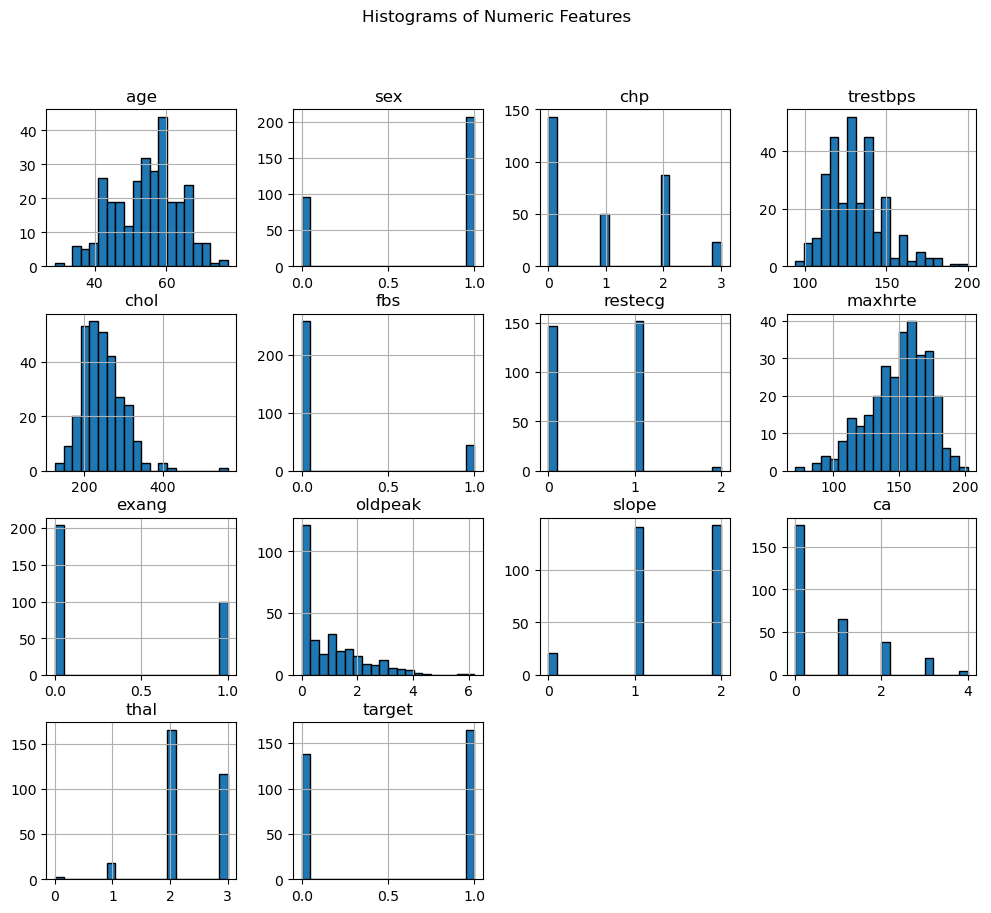

In [18]:
#Histogram to visualize the numerical value distribution for all features.
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

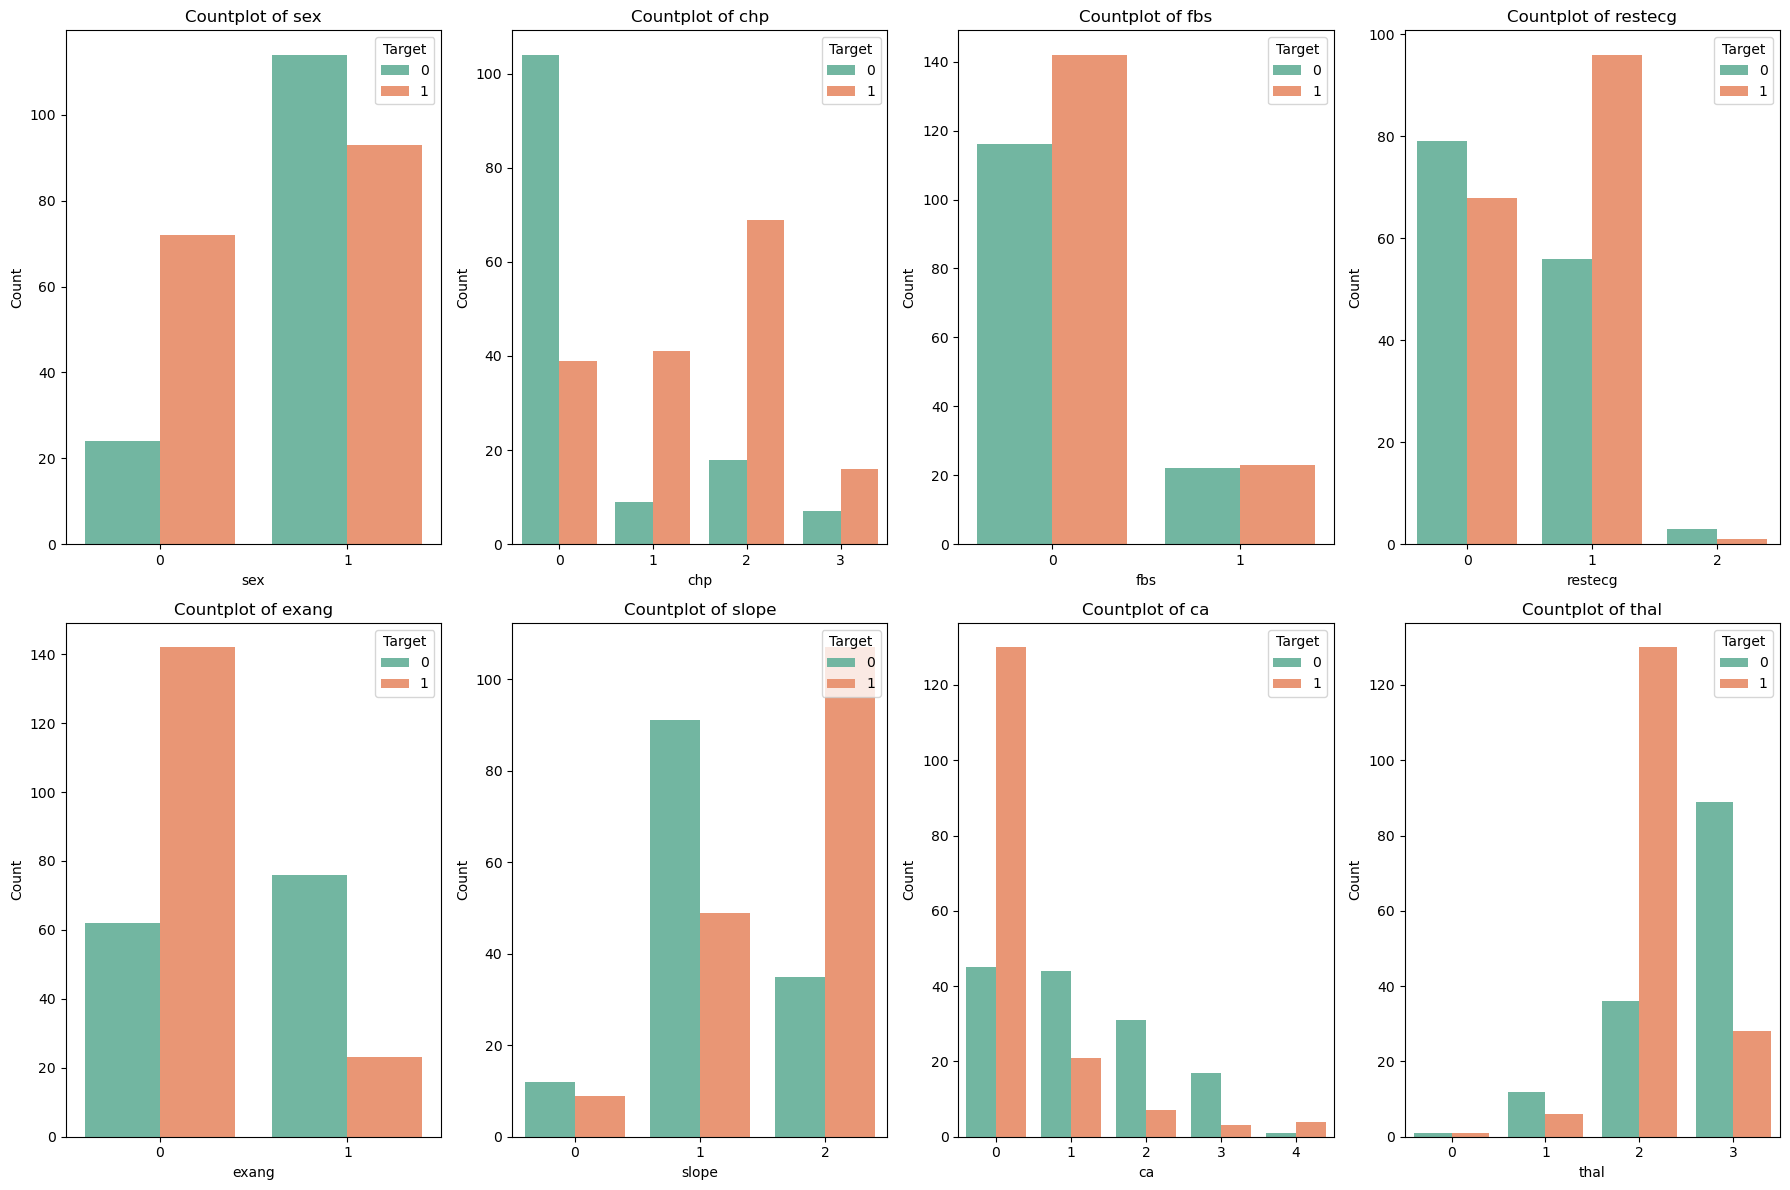

In [19]:
#COUNTPLOT for categorical columns
# List of categorical columns
categorical_columns = ['sex', 'chp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Define grid size for subplots
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  # Flatten axes array

# Loop through each column and plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', loc='upper right')

# Hide any extra subplots if columns < total grid slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


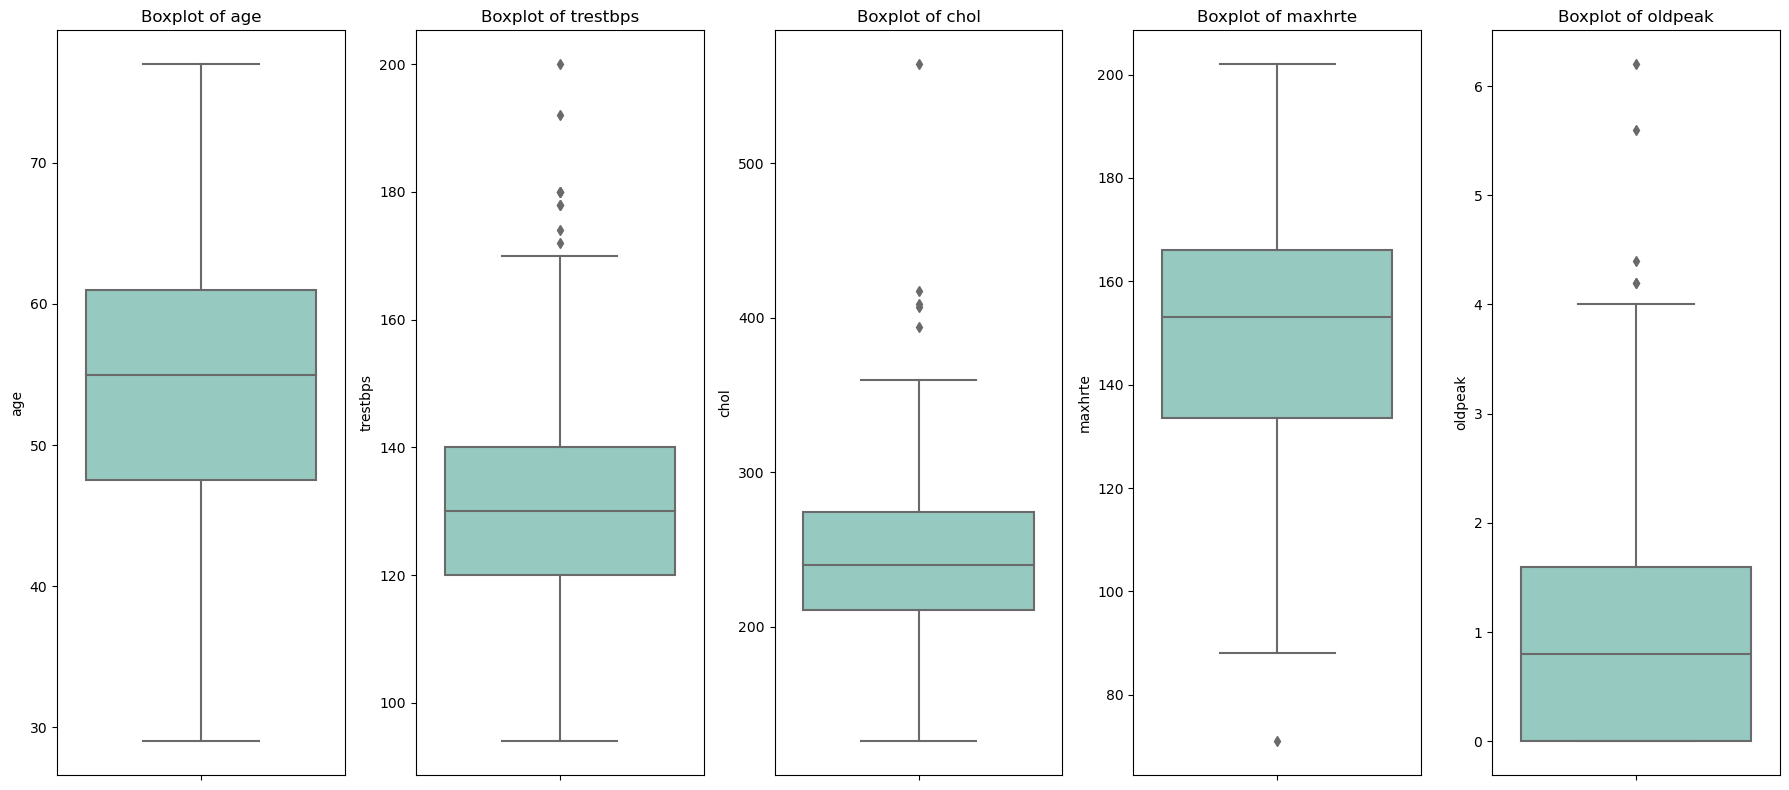

In [20]:
#BOXPLOT:

#List of Continuous columns
Continuous_columns = ['age', 'trestbps', 'chol', 'maxhrte', 'oldpeak']

# Setup for subplots
n_cols = 5
n_rows = (len(Continuous_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(Continuous_columns):
    sns.boxplot(y=col, data=df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


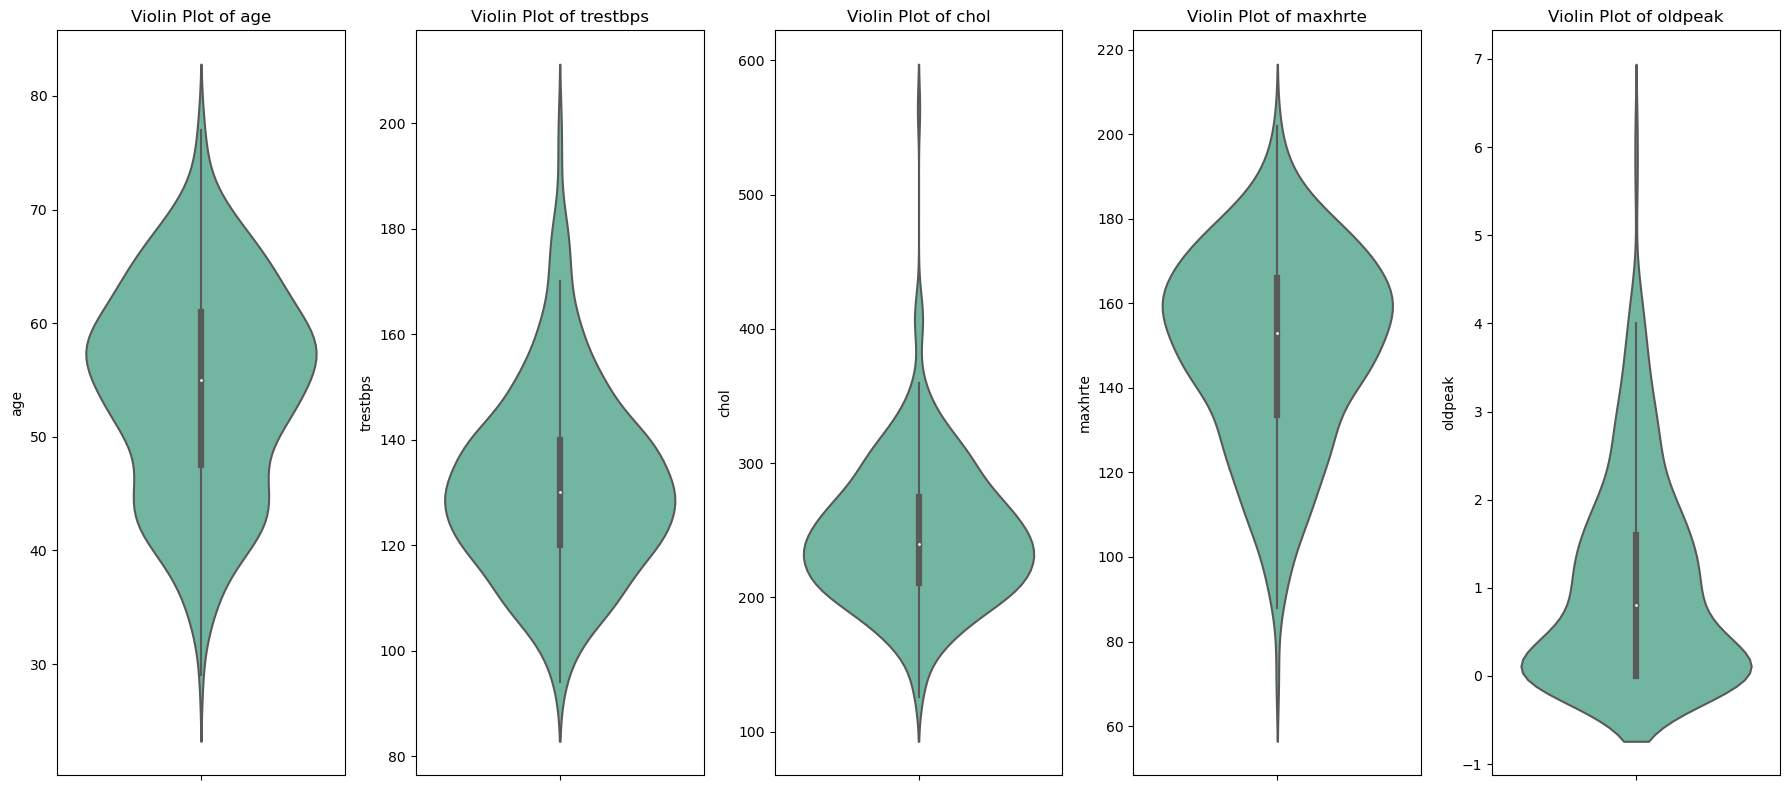

In [21]:
#Violin Plot for visualizing the symmetricity of the data
# Setup for subplots
n_cols = 5
n_rows = (len(Continuous_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

# Generate violin plots
for i, col in enumerate(Continuous_columns):
    sns.violinplot(y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Violin Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Inference: The data distribution of the continuous distribution features is symmetric.

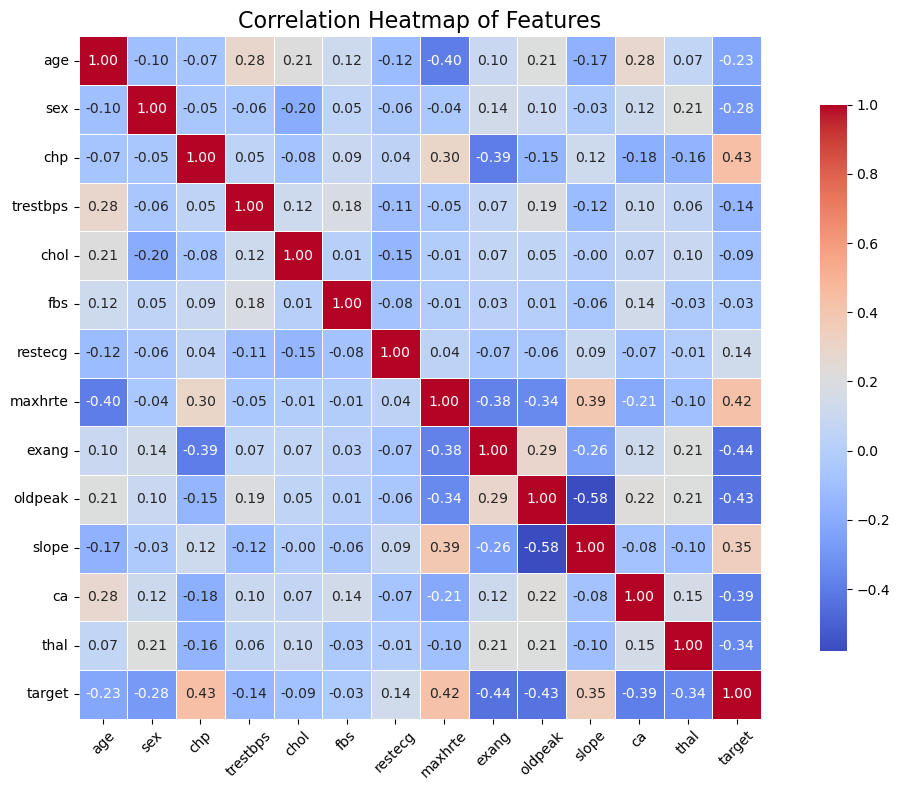

In [22]:
#Correlation of features in the dataset.
# Calculate correlation matrix
data_corr = df.corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Title and layout
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Detect Outliers 

In [23]:
#Detect outliers in continuous distribution and remove them:
# Remove outliers from each column
# Create a copy of the original DataFrame to clean
df_cleaned = df.copy()

# Create a DataFrame to store all outliers
outliers_all = pd.DataFrame()

# Detect and remove outliers
for col in Continuous_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"\nOutliers in '{col}': {len(outliers)}")
    
    # Add current column's outliers to the full outliers DataFrame (optional)
    outliers_all = pd.concat([outliers_all, outliers])

    # Remove outliers from cleaned DataFrame
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Remove duplicate rows from all outliers (in case some rows were outliers in multiple columns)
outliers_all = outliers_all.drop_duplicates()

print("\nOriginal dataset shape:", df.shape)
print("Outlier rows detected:", outliers_all.shape[0])
print("Cleaned dataset shape :", df_cleaned.shape)




Outliers in 'age': 0

Outliers in 'trestbps': 9

Outliers in 'chol': 5

Outliers in 'maxhrte': 1

Outliers in 'oldpeak': 4

Original dataset shape: (303, 14)
Outlier rows detected: 19
Cleaned dataset shape : (284, 14)


#### Skewness & Kurtosis

In [24]:
from scipy.stats import skew, kurtosis

# Create a DataFrame to store results
skew_kurt_df = pd.DataFrame(columns=['Feature', 'Skewness', 'Kurtosis', 'Skew Comment', 'Kurtosis Comment'])

# Loop through each column
for col in Continuous_columns:
    sk = skew(df_cleaned[col])
    ku = kurtosis(df_cleaned[col])

    # Analyze skewness
    if sk < -1:
        skew_comment = "Highly negatively skewed"
    elif sk < -0.5:
        skew_comment = "Moderately negatively skewed"
    elif sk < 0.5:
        skew_comment = "Approximately symmetric"
    elif sk < 1:
        skew_comment = "Moderately positively skewed"
    else:
        skew_comment = "Highly positively skewed"

    # Analyze kurtosis
    if ku < 0:
        kurt_comment = "Platykurtic (light tails)"
    elif ku < 3:
        kurt_comment = "Mesokurtic (normal-like)"
    else:
        kurt_comment = "Leptokurtic (heavy tails)"

    # Append to the DataFrame
    skew_kurt_df = skew_kurt_df.append({
        'Feature': col,
        'Skewness': round(sk, 2),
        'Kurtosis': round(ku, 2),
        'Skew Comment': skew_comment,
        'Kurtosis Comment': kurt_comment
    }, ignore_index=True)

# Display the result
print("\nSkewness & Kurtosis Analysis:")
print(skew_kurt_df)



Skewness & Kurtosis Analysis:
    Feature  Skewness  Kurtosis                  Skew Comment  \
0       age     -0.14     -0.58       Approximately symmetric   
1  trestbps      0.25     -0.22       Approximately symmetric   
2      chol      0.20     -0.29       Approximately symmetric   
3   maxhrte     -0.49     -0.36       Approximately symmetric   
4   oldpeak      0.92     -0.10  Moderately positively skewed   

            Kurtosis Comment  
0  Platykurtic (light tails)  
1  Platykurtic (light tails)  
2  Platykurtic (light tails)  
3  Platykurtic (light tails)  
4  Platykurtic (light tails)  


#### Kurtosis visualization

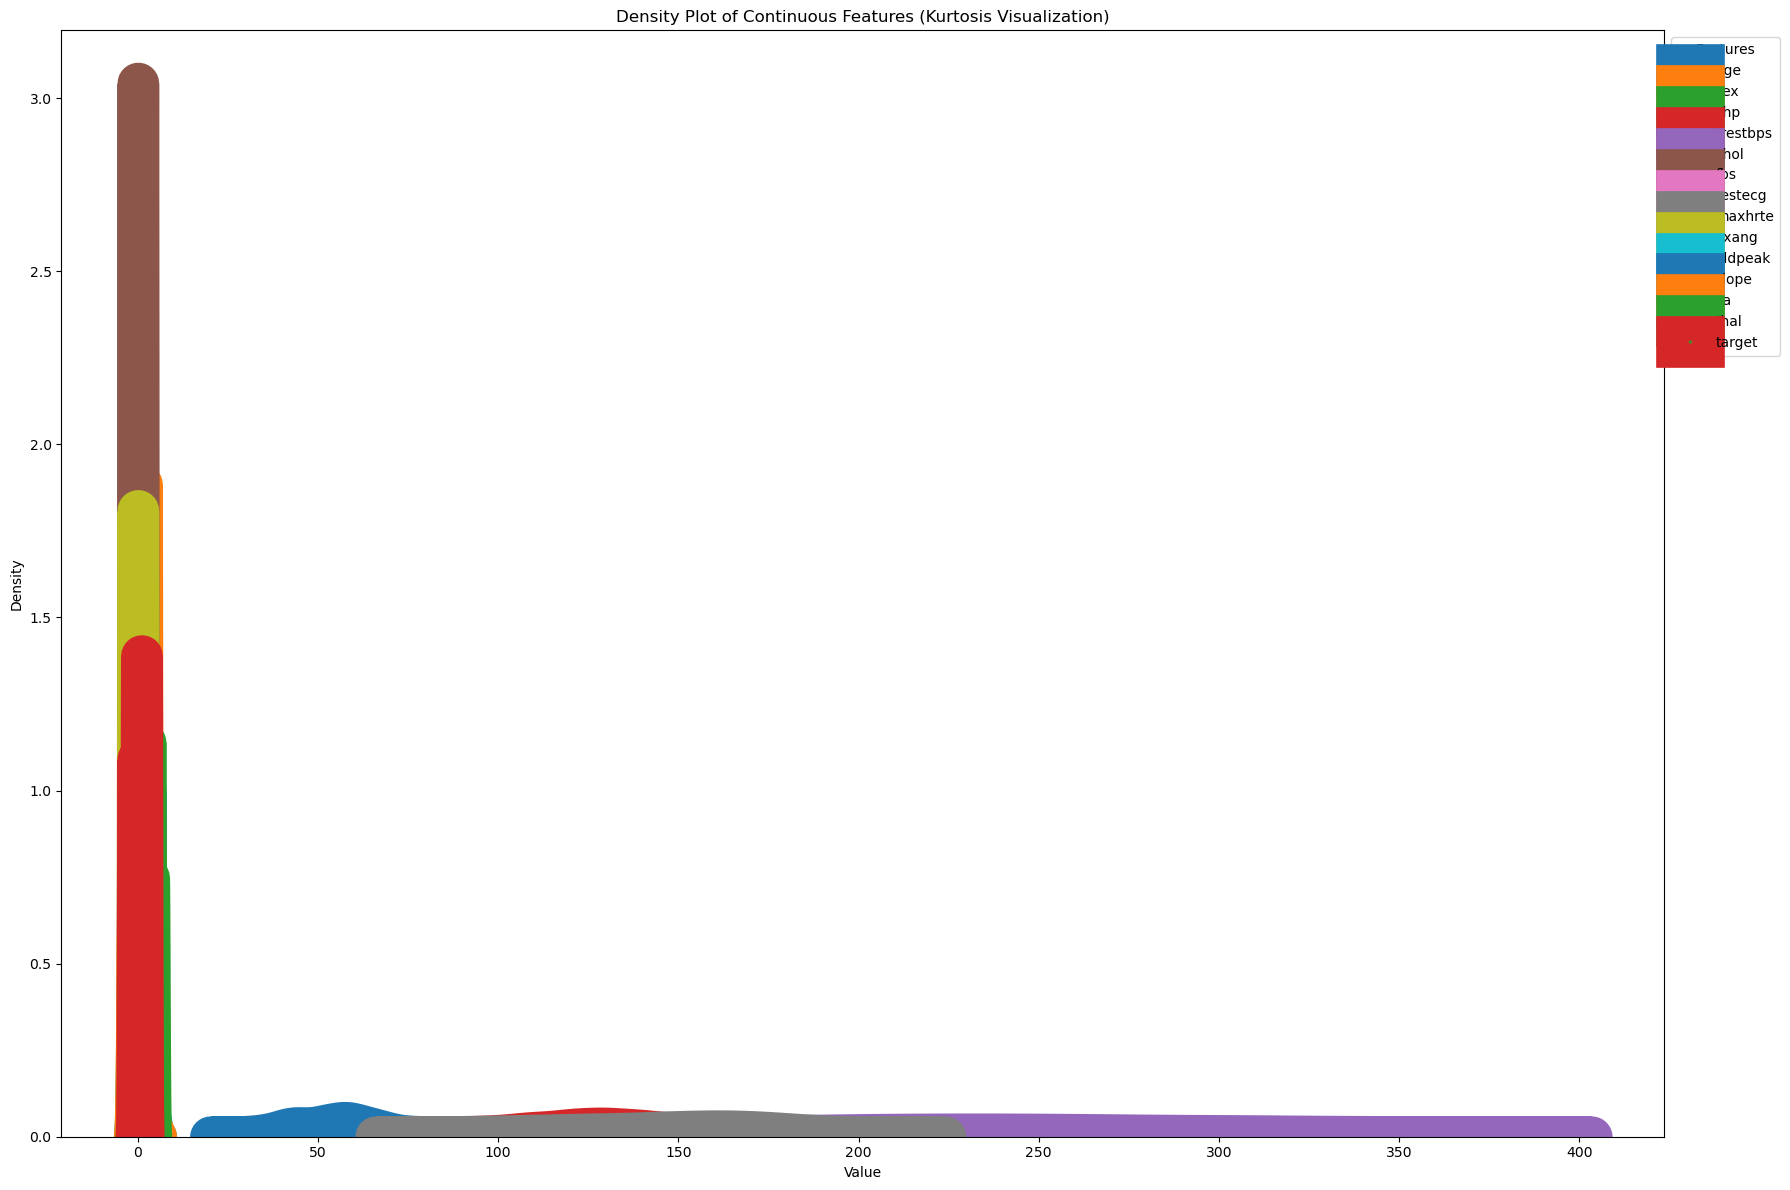

In [28]:
# Plot the results
plt.figure(figsize=(18, 12))
for col in df_cleaned.columns:
    sns.kdeplot(data=df_cleaned[col], label=col, fill=True, linewidth=30)

plt.title('Density Plot of Continuous Features (Kurtosis Visualization)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Features', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
#Prepare training data and test data for ML model to work on:
X_clean = df_cleaned.drop('target', axis=1) # features of dataset which are deciding factors.
y_clean = df_cleaned['target'] # class of Label in the dataset.

#Split the data into training and test datasets:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=45, stratify=y_clean)

# Shapes check
print("Training features shape :", X_train.shape)
print("Test features shape     :", X_test.shape)
print("Training labels shape   :", y_train.shape)
print("Test labels shape       :", y_test.shape)



Training features shape : (227, 13)
Test features shape     : (57, 13)
Training labels shape   : (227,)
Test labels shape       : (57,)


### PRE-PROCESSING

In [30]:
# Scaling the datasets 
Pre_Scaler = StandardScaler()
X_train_scaled = Pre_Scaler.fit_transform(X_train)
X_test_scaled = Pre_Scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((227, 13), (57, 13))

In [38]:
### Model Instantiate with assumed parameter values
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=45)
sv = SVC(kernel='linear')
gr = GradientBoostingClassifier()
xgb = XGBClassifier()

### Model Training & Prediction


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.76      0.88      0.81        32

    accuracy                           0.77        57
   macro avg       0.78      0.76      0.76        57
weighted avg       0.78      0.77      0.77        57

**************************************************

Model: Random Forest
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.79      0.84      0.82        32

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.78        57
weighted avg       0.79      0.79      0.79        57

**************************************************

Model: SVM
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.76      0.88      0.81        32

    accuracy      

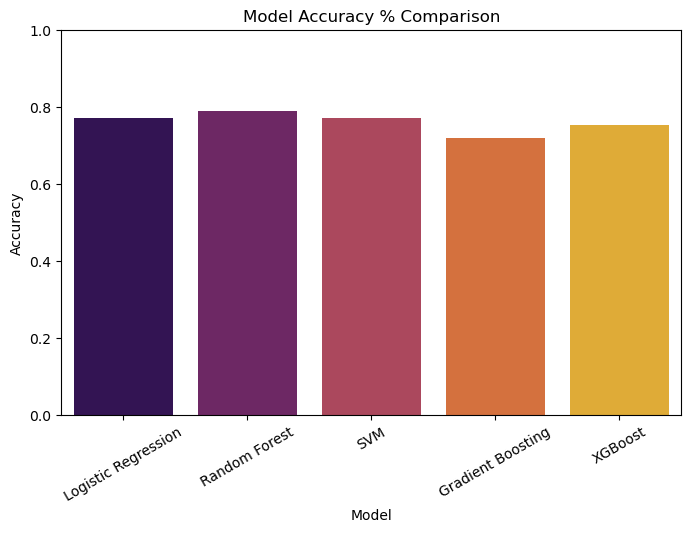

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'XGBoost')])

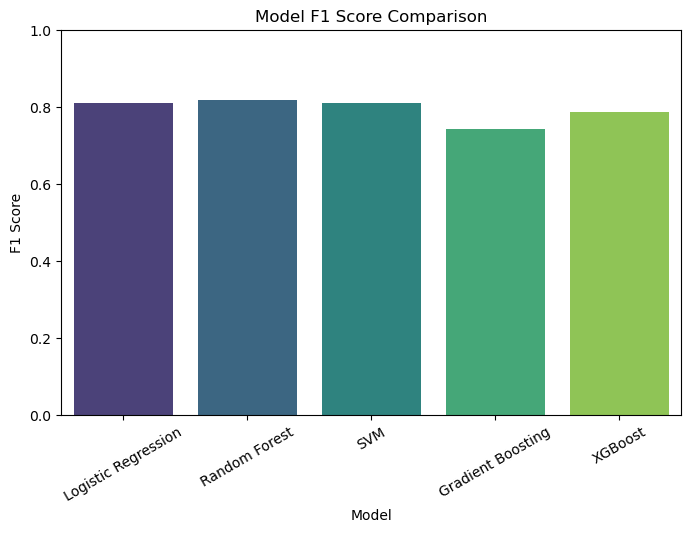

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & Evaluate Models
Out_Matrix = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred) # Accuracy of the model
    f1 = f1_score(y_test, y_pred) # F1 score of the model.
    
    Out_Matrix.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("*"*50)

# Convert to DataFrame for Plotting
df_out = pd.DataFrame(Out_Matrix)

# Plot Model Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=df_out, palette="inferno")
plt.ylim(0,1)
plt.title("Model Accuracy % Comparison")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1 Score", data=df_out, palette="viridis")
plt.ylim(0,1)
plt.title("Model F1 Score Comparison")
plt.xticks(rotation=30)

#### ROC AUC CURVE

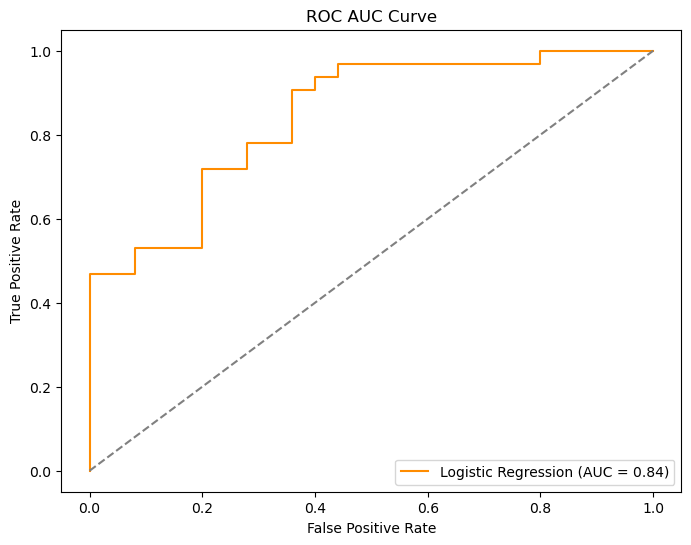

In [33]:
#Logistic Regression fit
lg.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_probs_lg = lg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lg)
auc_score = roc_auc_score(y_test, y_probs_lg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

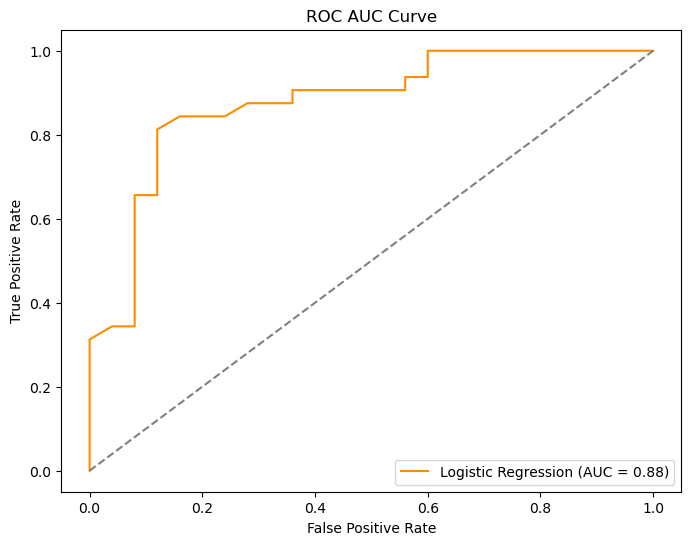

In [34]:
#Random Forest Classifier fit
rf.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
auc_score = roc_auc_score(y_test, y_probs_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

INFERENCE: Random Forest Classifier model performs little better than Logistic Rregression in predicting heart attack chances having better accuracy & better in ROC-CURVE.

#### Feature Importance in Random Forest Algorithm

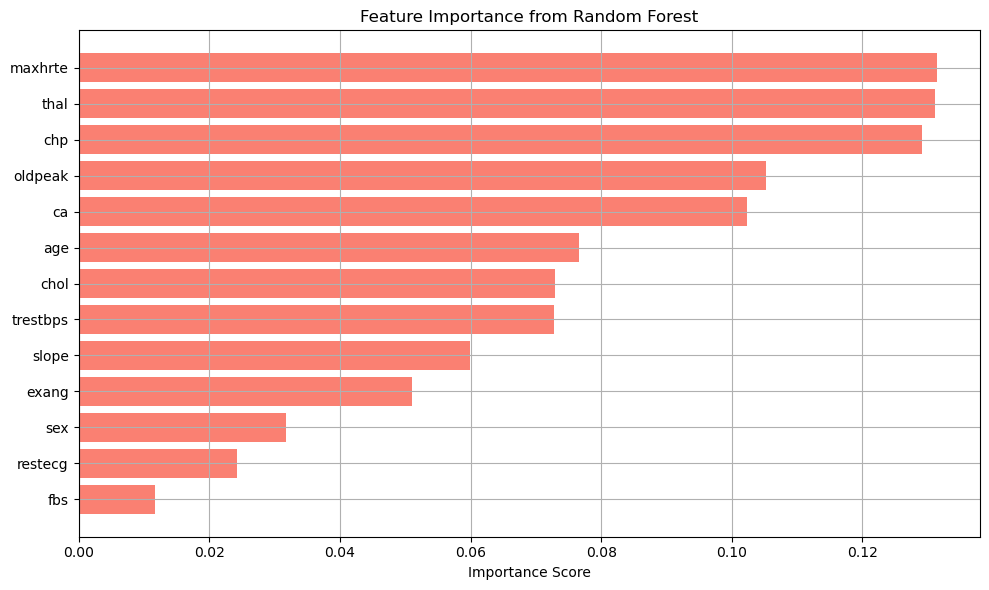

In [37]:
# To find the feature which is the most contributing factor to chances of heart attack through Random Forest Algorithm

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
df_imp_ftrs = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_imp_ftrs = df_imp_ftrs.sort_values(by='Importance', ascending=False)

# Horizontal Bar Plot to visualize the feature importances.
plt.figure(figsize=(10, 6))
plt.barh(df_imp_ftrs['Feature'], df_imp_ftrs['Importance'], color='salmon')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


### Hyperparameter tuning

In [54]:
# Using GridSearchCV we can find the correct parameters to be used to bring the best output for our model.

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,             # 5-fold cross-validation
                           scoring='roc_auc',
                           n_jobs=-1,         # Use all CPU cores
                           verbose=1)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.916876923076923


In [56]:
# Performance after tuning the model:

# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred_tn = best_rf.predict_proba(X_test_scaled)[:,1]

Tn_Roc = roc_auc_score(y_test, y_pred_tn)
print(f"\nTuned Roc score: {Tn_Roc}")

# Older Roc score:
print(f"\nOLD Roc score: {auc_score}")


Tuned Roc score: 0.9

OLD Roc score: 0.876875


OBSERVATION: Tuning the model in terms of Accuracy score resulted in overfitting and giving lesser accuracy.

NOTE: Tuning the model in terms of AUC score helped to improve the model increasing the score more closer to 1 and hence a better model at predicting heart attack chances.